### Import Lib

In [36]:
import pandas as pd
import tqdm.notebook as tq
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Missing data and Data cleaning

In [37]:
df = pd.read_excel('data_problem2.xlsx')
df.head(3)

,Name,major,School year,P1C1,P1C2 (nhà xe),P1C2 (thư viện),P1C2 (phòng lý thuyết),P1C2 (phòng thực hành),P1C2 (thang máy),P1C2 (căn tin),...,"P1C4(máy chiếu, bảng)",P1C5,P2C1,P2C2,P2C3,P2C4,P2C5,P2C6,P2C7,P2C8
0,Trịnh Thị Bảo Bảo,KHDL,15,3,1,0,0,1.0,1,0.0,...,1,4,4,3,3.0,3.0,3,4,4,4
1,Lê Thanh Di,KHDL,17,3,1,0,1,1.0,1,0.0,...,0,2,4,3,3.0,4.0,4,3,4,4
2,Huỳnh Quốc Bảo,KTPM,16,4,1,1,0,0.0,0,0.0,...,1,3,3,3,3.0,4.0,4,3,3,3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    73 non-null     object 
 1   major                   73 non-null     object 
 2   School year             73 non-null     object 
 3   P1C1                    73 non-null     int64  
 4   P1C2 (nhà xe)           73 non-null     int64  
 5   P1C2 (thư viện)         73 non-null     int64  
 6   P1C2 (phòng lý thuyết)  73 non-null     int64  
 7   P1C2 (phòng thực hành)  72 non-null     float64
 8   P1C2 (thang máy)        73 non-null     int64  
 9   P1C2 (căn tin)          72 non-null     float64
 10  P1C2 (hội trường)       73 non-null     int64  
 11  P1C2 (khuôn viên)       73 non-null     int64  
 12  P1C2 (wc)               73 non-null     int64  
 13  P1C2 (văn phòng)        73 non-null     int64  
 14  P1C3                    73 non-null     int6

In [39]:
df = df.rename(columns={'major ': 'major'})
df['major'].fillna('More', inplace=True)
df['Name'].fillna('Unknown', inplace=True)
df['School year'].fillna('More', inplace=True)
df['major'] = df['major'].apply(lambda x: x.strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    73 non-null     object 
 1   major                   73 non-null     object 
 2   School year             73 non-null     object 
 3   P1C1                    73 non-null     int64  
 4   P1C2 (nhà xe)           73 non-null     int64  
 5   P1C2 (thư viện)         73 non-null     int64  
 6   P1C2 (phòng lý thuyết)  73 non-null     int64  
 7   P1C2 (phòng thực hành)  72 non-null     float64
 8   P1C2 (thang máy)        73 non-null     int64  
 9   P1C2 (căn tin)          72 non-null     float64
 10  P1C2 (hội trường)       73 non-null     int64  
 11  P1C2 (khuôn viên)       73 non-null     int64  
 12  P1C2 (wc)               73 non-null     int64  
 13  P1C2 (văn phòng)        73 non-null     int64  
 14  P1C3                    73 non-null     int6

In [40]:
df.to_excel('data_problem2.xlsx', index = False)

### Mô tả về dữ liệu

In [41]:
df = pd.read_excel('data_problem2.xlsx')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    73 non-null     object 
 1   major                   73 non-null     object 
 2   School year             73 non-null     object 
 3   P1C1                    73 non-null     int64  
 4   P1C2 (nhà xe)           73 non-null     int64  
 5   P1C2 (thư viện)         73 non-null     int64  
 6   P1C2 (phòng lý thuyết)  73 non-null     int64  
 7   P1C2 (phòng thực hành)  72 non-null     float64
 8   P1C2 (thang máy)        73 non-null     int64  
 9   P1C2 (căn tin)          72 non-null     float64
 10  P1C2 (hội trường)       73 non-null     int64  
 11  P1C2 (khuôn viên)       73 non-null     int64  
 12  P1C2 (wc)               73 non-null     int64  
 13  P1C2 (văn phòng)        73 non-null     int64  
 14  P1C3                    73 non-null     int6

- Cột Name: Tên của sinh viên làm khảo sát (Giá trị string)
- Cột major: Chuyên ngành của sinh viên làm khảo sát (Các chuyên ngành của khoa công nghệ thông tin) (Giá trị string)
- Cột School year: Khóa của sinh viên làm khảo sát (K15 → K18)  (Giá trị number từ 15 → 18 đại diện cho mỗi khóa)
- Những cột còn lại mang quy tắt như sau:
> Nếu cột có dạng **PxCy**: có nghĩa đây là câu hỏi thuộc phần x câu hỏi thứ y *(Giá trị number từ 1 → 4: trong đó 1↔Tệ, 2↔Chưa tốt, 3↔Tạm ổn, 4↔Tốt)* \
> Nếu cột có dạng **PxCy(Subject name)** : có nghĩa đây là câu hỏi thuộc phần x câu hỏi thứ y và là đối tượng <subject name> (ví dụ: thang máy, máy tính,...) *(Giá trị là 0 hoặc 1: 0↔ Không đồng ý, 1↔ Đồng ý)*


In [43]:
year = df['School year'].value_counts().index

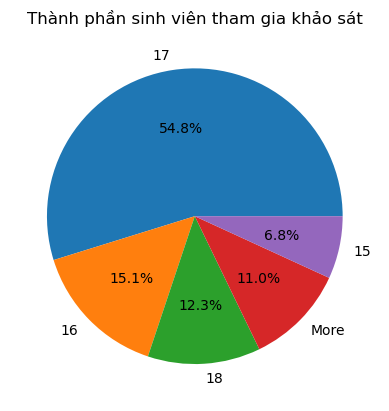

17      40
16      11
18       9
More     8
15       5
Name: School year, dtype: int64


In [44]:
plt.pie(df['School year'].value_counts(), labels = year,  autopct='%1.1f%%')
plt.title('Thành phần sinh viên tham gia khảo sát')
plt.show()
print(df['School year'].value_counts())

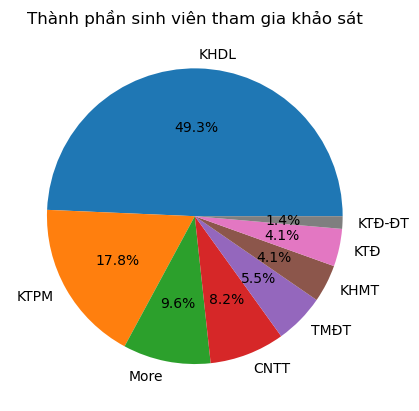

KHDL      36
KTPM      13
More       7
CNTT       6
TMĐT       4
KHMT       3
KTĐ        3
KTĐ-ĐT     1
Name: major, dtype: int64


In [45]:
year = df['major'].value_counts().index
plt.pie(df['major'].value_counts(), labels = year,  autopct='%1.1f%%')
plt.title('Thành phần sinh viên tham gia khảo sát')
plt.show()
print(df['major'].value_counts())

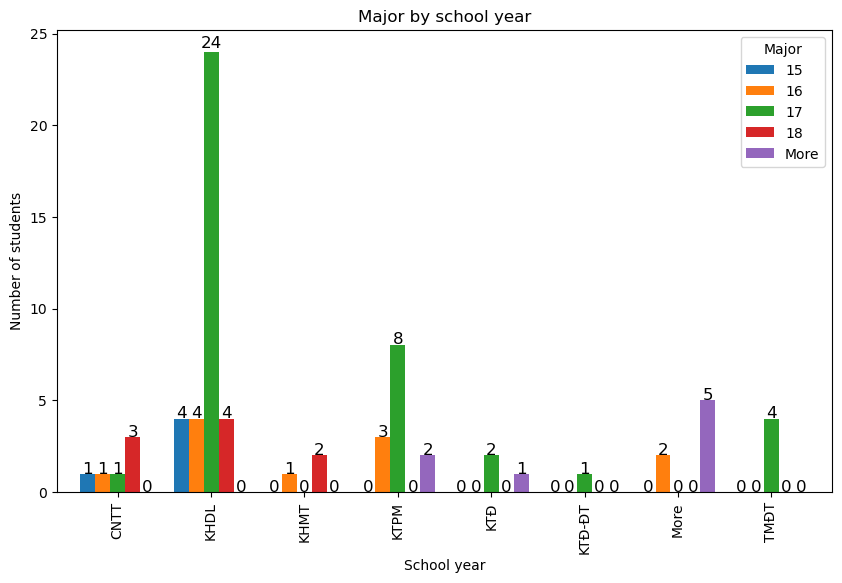

In [46]:
# nhóm dữ liệu và tính số lượng sinh viên cho từng nhóm
counts = df.groupby(['major', 'School year']).size().unstack(fill_value=0)

# tạo biểu đồ cột
ax = counts.plot(kind='bar', figsize=(10, 6), width=0.8)

# tùy chỉnh chiều rộng của các cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() * 1.01), ha='center', fontsize=12)

# thiết lập tiêu đề và chú thích
plt.title('Major by school year')
plt.xlabel('School year')
plt.ylabel('Number of students')
plt.legend(title='Major')

# hiển thị biểu đồ
plt.show()

### Thực hiện các thống kê căn bản

In [47]:
df.describe()

,P1C1,P1C2 (nhà xe),P1C2 (thư viện),P1C2 (phòng lý thuyết),P1C2 (phòng thực hành),P1C2 (thang máy),P1C2 (căn tin),P1C2 (hội trường),P1C2 (khuôn viên),P1C2 (wc),...,"P1C4(máy chiếu, bảng)",P1C5,P2C1,P2C2,P2C3,P2C4,P2C5,P2C6,P2C7,P2C8
count,73.000000,73.000000,73.000000,73.000000,72.000000,73.000000,72.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,72.000000,72.000000,73.000000,73.000000,73.000000,73.000000
mean,3.219178,0.808219,0.082192,0.301370,0.430556,0.602740,0.305556,0.068493,0.273973,0.301370,...,0.287671,2.726027,3.178082,3.191781,3.138889,3.416667,3.287671,3.082192,3.410959,3.178082
std,0.583252,0.396426,0.276557,0.462028,0.498629,0.492717,0.463875,0.254338,0.449082,0.462028,...,0.455810,0.820912,0.631191,0.592957,0.634802,0.666080,0.611906,0.618093,0.619938,0.694071
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,3.000000,3.000000,3.500000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### Thống kê function

In [48]:
# Thống kê trung bình, trung vị và độ lệch chuẩn của câu hỏi nhiều đáp án
def Thongke(col, more):
    print(f'------{col[4:]}------')
    tb =  round(df[col].mean(), 2)
    if more:
        print(f"|Trung bình:", tb)
        print(f"|Trung vị:", round(df[col].median(), 2))
        print(f"|Độ lệch chuẩn:", round(df[col].std(), 2))
        print('|')

        if tb < 2:
            print('| => Cần cải thiện ngay')
        elif tb < 3:
            print('| => Cần cải thiện')
        else:
            print('| => Ổn')
            
    else:
        print(f"|Trung bình:", tb)
        
        if tb > 0.75:
            print('| => Cần cải thiện ngay')
        elif tb > 0.5:
            print('| => Cần cải thiện')

    print()

In [81]:
# Thống kê trung bình, trung vị và độ lệch chuẩn của các cột
def Thongke_paper(col, more):
    print(f'{col}')
    tb =  round(df[col].mean(), 2)
    if more:
        print(f"Trung bình:", tb)
        print(f"Trung vị:", round(df[col].median(), 2))
        print(f"Độ lệch chuẩn:", round(df[col].std(), 2))

    

    print()

### Visualization function

In [49]:
def Visual(col_x, col_y, x_label, y_label, title):
    # Dữ liệu từ 2 list
    plt.figure(figsize=(10, 5))

    # Tạo palette màu sắc ngẫu nhiên cho từng cột
    palette = np.random.choice(range(10), len(col_x))

    # Vẽ biểu đồ cột
    plt.bar(col_x, col_y, color=plt.cm.Set2(palette), edgecolor='black', linewidth=1.2)

    # Thêm giá trị trên mỗi cột
    for i, v in enumerate(col_y):
        plt.text(i, v + 0.1, str(v), ha='center', fontsize=12)

    # Thiết lập tiêu đề và chú thích
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Hiển thị biểu đồ
    plt.show()

In [83]:
Thongke_paper('P1C1', True)
Thongke_paper('P1C2 (nhà xe)', True)
Thongke_paper('P1C2 (thư viện)', True)
Thongke_paper('P1C2 (phòng lý thuyết)', True)
Thongke_paper('P1C2 (phòng thực hành)', True)
Thongke_paper('P1C2 (thang máy)', True)
Thongke_paper('P1C2 (căn tin)', True)
Thongke_paper('P1C2 (hội trường)', True)
Thongke_paper('P1C2 (khuôn viên)', True)
Thongke_paper('P1C2 (wc)', True)
Thongke_paper('P1C2 (văn phòng)', True)
Thongke_paper('P1C3', True)
Thongke_paper('P1C4(điều hòa, quạt)', True)
Thongke_paper('P1C4(đèn)', True)
Thongke_paper('P1C4(wifi)', True)
Thongke_paper('P1C4(bàn, ghế)', True)
Thongke_paper('P1C4(thang máy)', True)
Thongke_paper('P1C4(máy tính)', True)
Thongke_paper('P1C4(giáo trình)', True)
Thongke_paper('P1C4(máy chiếu, bảng)', True)
Thongke_paper('P1C5', True)
Thongke_paper('P2C1', True)
Thongke_paper('P2C2', True)
Thongke_paper('P2C3', True)
Thongke_paper('P2C4', True)
Thongke_paper('P2C5', True)
Thongke_paper('P2C6', True)
Thongke_paper('P2C7', True)
Thongke_paper('P2C8', True)

P1C1
Trung bình: 3.22
Trung vị: 3.0
Độ lệch chuẩn: 0.58

P1C2 (nhà xe)
Trung bình: 0.81
Trung vị: 1.0
Độ lệch chuẩn: 0.4

P1C2 (thư viện)
Trung bình: 0.08
Trung vị: 0.0
Độ lệch chuẩn: 0.28

P1C2 (phòng lý thuyết)
Trung bình: 0.3
Trung vị: 0.0
Độ lệch chuẩn: 0.46

P1C2 (phòng thực hành)
Trung bình: 0.43
Trung vị: 0.0
Độ lệch chuẩn: 0.5

P1C2 (thang máy)
Trung bình: 0.6
Trung vị: 1.0
Độ lệch chuẩn: 0.49

P1C2 (căn tin)
Trung bình: 0.31
Trung vị: 0.0
Độ lệch chuẩn: 0.46

P1C2 (hội trường)
Trung bình: 0.07
Trung vị: 0.0
Độ lệch chuẩn: 0.25

P1C2 (khuôn viên)
Trung bình: 0.27
Trung vị: 0.0
Độ lệch chuẩn: 0.45

P1C2 (wc)
Trung bình: 0.3
Trung vị: 0.0
Độ lệch chuẩn: 0.46

P1C2 (văn phòng)
Trung bình: 0.04
Trung vị: 0.0
Độ lệch chuẩn: 0.2

P1C3
Trung bình: 2.86
Trung vị: 3.0
Độ lệch chuẩn: 0.63

P1C4(điều hòa, quạt)
Trung bình: 0.58
Trung vị: 1.0
Độ lệch chuẩn: 0.5

P1C4(đèn)
Trung bình: 0.15
Trung vị: 0.0
Độ lệch chuẩn: 0.36

P1C4(wifi)
Trung bình: 0.84
Trung vị: 1.0
Độ lệch chuẩn: 0.37

P1C4

# Kết quả khảo sát về CSVC nhà trường
**Câu hỏi lớn: Trải qua thời gian làm quen và học tập trong các chuyên ngành
của ngành Công nghệ thông tin ở IUH thì bạn có cảm thấy hài
lòng về cơ sở vật chất của trường không?**

## Về CSVC

#### Cơ sở (các khu vực học tập, không gian) của trường (ngành) hiện đang trong tình trạng như thế nào?

In [50]:
Thongke('P1C1', True)

------------
|Trung bình: 3.22
|Trung vị: 3.0
|Độ lệch chuẩn: 0.58
|
| => Ổn



In [51]:
Thongke('P1C2 (nhà xe)', False)
Thongke('P1C2 (thư viện)', False)
Thongke('P1C2 (phòng lý thuyết)', False)
Thongke('P1C2 (phòng thực hành)', False)
Thongke('P1C2 (thang máy)', False)
Thongke('P1C2 (căn tin)', False)
Thongke('P1C2 (hội trường)', False)
Thongke('P1C2 (khuôn viên)', False)
Thongke('P1C2 (wc)', False)
Thongke('P1C2 (văn phòng)', False)

------ (nhà xe)------
|Trung bình: 0.81
| => Cần cải thiện ngay

------ (thư viện)------
|Trung bình: 0.08

------ (phòng lý thuyết)------
|Trung bình: 0.3

------ (phòng thực hành)------
|Trung bình: 0.43

------ (thang máy)------
|Trung bình: 0.6
| => Cần cải thiện

------ (căn tin)------
|Trung bình: 0.31

------ (hội trường)------
|Trung bình: 0.07

------ (khuôn viên)------
|Trung bình: 0.27

------ (wc)------
|Trung bình: 0.3

------ (văn phòng)------
|Trung bình: 0.04



#### Trực quan hóa

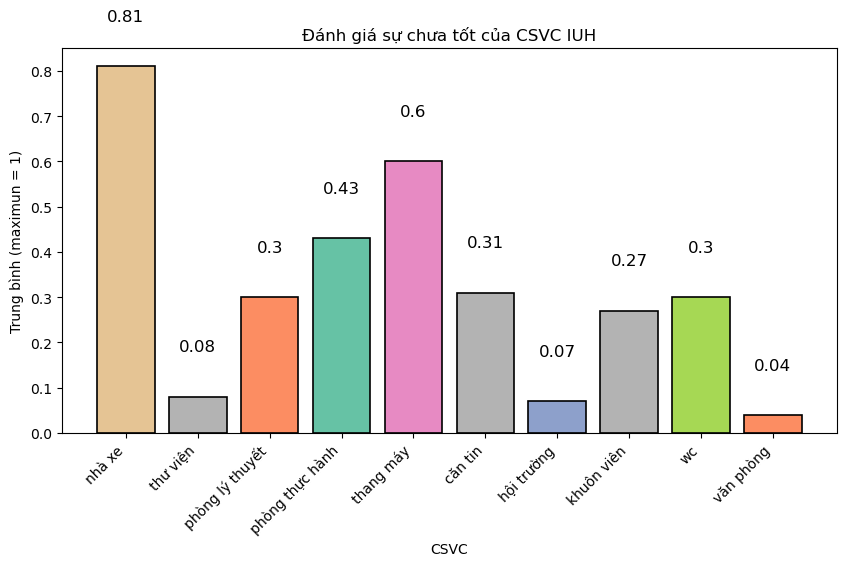

In [52]:
csvc = ['nhà xe', 'thư viện', 'phòng lý thuyết', 'phòng thực hành', 'thang máy', 'căn tin', 'hội trường', 'khuôn viên', 'wc', 'văn phòng']
mean_val_csvc = [0.81, 0.08, 0.3, 0.43, 0.6, 0.31, 0.07, 0.27, 0.3, 0.04]
Visual(col_x = csvc, col_y = mean_val_csvc, x_label = 'CSVC', y_label = 'Trung bình (maximun = 1)', title = 'Đánh giá sự chưa tốt của CSVC IUH')

## Về trang thiết bị

#### Các trang thiết bị của trường (ngành) hiện đang trong tình trạng như thế nào?

In [53]:
Thongke('P1C3', True)

------------
|Trung bình: 2.86
|Trung vị: 3.0
|Độ lệch chuẩn: 0.63
|
| => Cần cải thiện



In [54]:
Thongke('P1C4(thang máy)', False)
Thongke('P1C4(điều hòa, quạt)', False)
Thongke('P1C4(đèn)', False)
Thongke('P1C4(wifi)', False)
Thongke('P1C4(bàn, ghế)', False)
Thongke('P1C4(máy tính)', False)
Thongke('P1C4(giáo trình)', False)
Thongke('P1C4(máy chiếu, bảng)', False)

------(thang máy)------
|Trung bình: 0.56
| => Cần cải thiện

------(điều hòa, quạt)------
|Trung bình: 0.58
| => Cần cải thiện

------(đèn)------
|Trung bình: 0.15

------(wifi)------
|Trung bình: 0.84
| => Cần cải thiện ngay

------(bàn, ghế)------
|Trung bình: 0.22

------(máy tính)------
|Trung bình: 0.55
| => Cần cải thiện

------(giáo trình)------
|Trung bình: 0.32

------(máy chiếu, bảng)------
|Trung bình: 0.29



#### Trực quan hóa

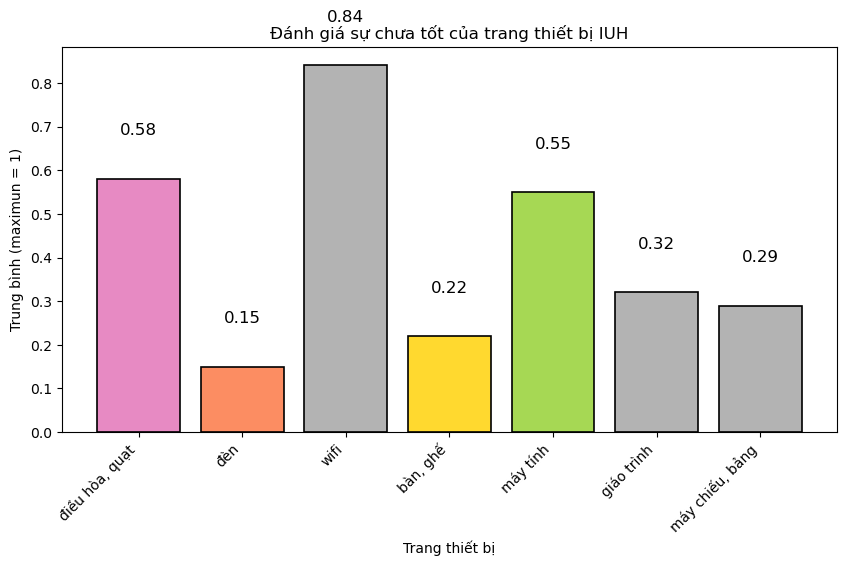

In [55]:
ttb = ['điều hòa, quạt', 'đèn', 'wifi', 'bàn, ghế', 'máy tính', 'giáo trình', 'máy chiếu, bảng']
mean_val_ttb = [0.58, 0.15, 0.84, 0.22, 0.55, 0.32, 0.29]
Visual(col_x = ttb, col_y = mean_val_ttb, x_label = 'Trang thiết bị', y_label = 'Trung bình (maximun = 1)', title = 'Đánh giá sự chưa tốt của trang thiết bị IUH')

#### Các website online của trường (ngành) hiện đang trong tình trạng như thế nào, có hoạt động tốt không (trang sv, lms, ...) ?

In [56]:
Thongke('P1C5', True)

------------
|Trung bình: 2.73
|Trung vị: 3.0
|Độ lệch chuẩn: 0.82
|
| => Cần cải thiện



# Kết quả khảo sát về Chương trình đào tạo và đội ngũ giảng viên nhà trường
**Câu hỏi lớn: Trong thời gian học tập trong ngành CNTT ở IUH thì bạn có cảm nhận như thế nào về chương trình đào cùng sự dẫn dắt của đội ngũ giảng viên trong ngành?**

## Về chương trình đào tạo

#### Chương trình đào tạo được thiết kế phù hợp với công việc sau này như thế nào? P2C1

In [57]:
Thongke('P2C1', True)

------------
|Trung bình: 3.18
|Trung vị: 3.0
|Độ lệch chuẩn: 0.63
|
| => Ổn



#### Thiết kế chương trình đào tạo, khối lượng kiến thức đã hợp lý và phù hợp với năng lực của bạn? P2C3

In [58]:
Thongke('P2C3', True)

------------
|Trung bình: 3.14
|Trung vị: 3.0
|Độ lệch chuẩn: 0.63
|
| => Ổn



## Về đội ngũ giảng viên

#### Giảng viên dạy áp dụng kiến thức để làm các dự án thực tiễn trong cuộc sống như thế nào? P2C2

In [59]:
Thongke('P2C2', True)

------------
|Trung bình: 3.19
|Trung vị: 3.0
|Độ lệch chuẩn: 0.59
|
| => Ổn



#### Trình độ chuyên môn của đội ngũ giảng viên (kiến thức sâu rộng trong ngành)? P2C4

In [60]:
Thongke('P2C4', True)

------------
|Trung bình: 3.42
|Trung vị: 3.5
|Độ lệch chuẩn: 0.67
|
| => Ổn



#### Phương pháp giảng dạy của giảng viên (sự nhiệt tình giúp đỡ sinh viên, cách truyền đạt, giao bài tập)? P2C5

In [61]:
Thongke('P2C5', True)

------------
|Trung bình: 3.29
|Trung vị: 3.0
|Độ lệch chuẩn: 0.61
|
| => Ổn



#### Giảng viên ở mỗi giờ lên lớp, thì mức hiểu bài của bạn như nào? P2C6

In [62]:
Thongke('P2C6', True)

------------
|Trung bình: 3.08
|Trung vị: 3.0
|Độ lệch chuẩn: 0.62
|
| => Ổn



#### Các hoạt động nghiên cứu khoa học các cuộc thi và các buổi training trong chuyên ngành của mình? P2C7

In [63]:
Thongke('P2C7', True)

------------
|Trung bình: 3.41
|Trung vị: 3.0
|Độ lệch chuẩn: 0.62
|
| => Ổn



## Đánh giá

#### Tới thời điểm hiện tại, bạn cảm thấy như thế nào về chuyên ngành của bạn? P2C8

In [64]:
Thongke('P2C8', True)

------------
|Trung bình: 3.18
|Trung vị: 3.0
|Độ lệch chuẩn: 0.69
|
| => Ổn



#### Trực quan hóa

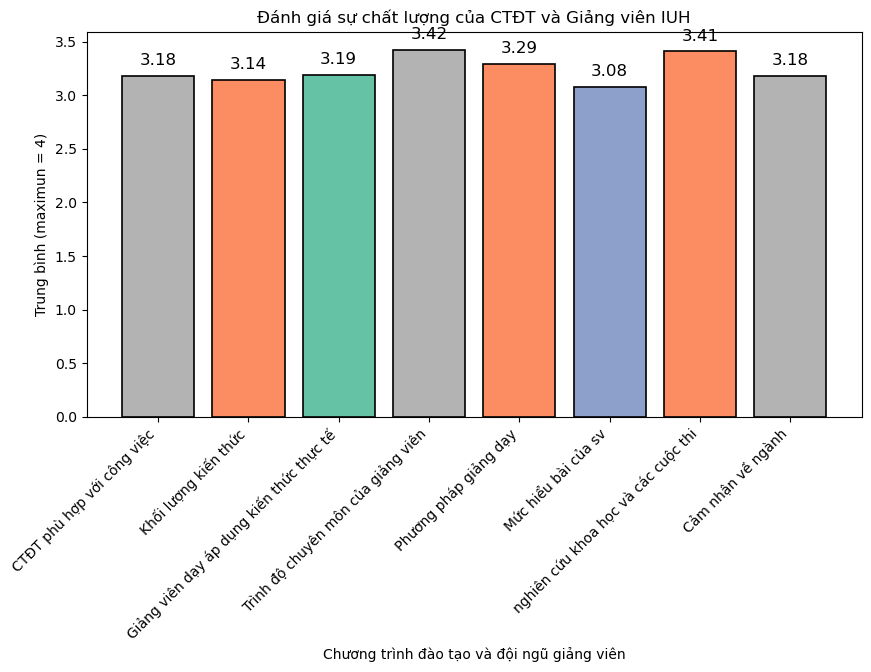

In [65]:
p2 = ['CTĐT phù hợp với công việc', 'Khối lượng kiến thức', 'Giảng viên dạy áp dụng kiến thức thực tế',
       'Trình độ chuyên môn của giảng viên', 'Phương pháp giảng dạy', 'Mức hiểu bài của sv',
     'nghiên cứu khoa học và các cuộc thi', 'Cảm nhận về ngành']
p2_val_mean = [3.18, 3.14, 3.19, 3.42, 3.29, 3.08, 3.41, 3.18]
Visual(col_x = p2, col_y = p2_val_mean, x_label = 'Chương trình đào tạo và đội ngũ giảng viên', y_label = 'Trung bình (maximun = 4)', title = 'Đánh giá sự chất lượng của CTĐT và Giảng viên IUH')

In [66]:
df[df['major'] == 'KHDL ']

,Name,major,School year,P1C1,P1C2 (nhà xe),P1C2 (thư viện),P1C2 (phòng lý thuyết),P1C2 (phòng thực hành),P1C2 (thang máy),P1C2 (căn tin),...,"P1C4(máy chiếu, bảng)",P1C5,P2C1,P2C2,P2C3,P2C4,P2C5,P2C6,P2C7,P2C8
